In [1]:
# Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import datetime
import warnings
warnings.filterwarnings("ignore")


In [3]:
import os
import pandas as pd

# Folder path
folder_path = r"D:\New folder (2)\unified mentor project\tcs stock market"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Dictionary to store DataFrames
dataframes = {}

# Load each CSV into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes[file] = df
    print(f"Loaded: {file} with shape {df.shape}")

# Example: access a specific DataFrame
# df1 = dataframes['filename.csv']


Loaded: TCS_stock_action.csv with shape (70, 3)
Loaded: TCS_stock_history.csv with shape (4463, 8)
Loaded: TCS_stock_info.csv with shape (150, 2)


In [13]:
df = dataframes['TCS_stock_history.csv']

# Check null values
print("Null values:\n", df.isnull().sum())

# Convert to numeric (if needed)
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    print(f"{column}: {before - df.shape[0]} outliers removed")
    return df

for col in ['Close', 'Volume']:
    if col in df.columns:
        df = remove_outliers_iqr(df, col)

# Update dictionary with cleaned data
dataframes['TCS_stock_history.csv'] = df

# Preview
print("Cleaned DataFrame shape:", df.shape)




Null values:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Close: 243 outliers removed
Volume: 262 outliers removed
Cleaned DataFrame shape: (3958, 8)


In [15]:
# Step 1: Preprocess TCS_stock_info.csv
df_info = dataframes['TCS_stock_info.csv']

print("\n--- TCS_stock_info.csv ---")
print("Null values:\n", df_info.isnull().sum())

# Convert numeric columns if necessary
numeric_cols_info = ['Market Cap', 'PE Ratio', 'PB Ratio', 'Dividend Yield']  # adjust based on actual columns
for col in numeric_cols_info:
    if col in df_info.columns:
        df_info[col] = pd.to_numeric(df_info[col], errors='coerce')

# Handle missing values
df_info.fillna(method='ffill', inplace=True)

print("Data types after conversion:\n", df_info.dtypes)
print("Shape after cleaning:", df_info.shape)

# Step 2: Preprocess TCS_stock_action.csv
df_action = dataframes['TCS_stock_action.csv']

print("\n--- TCS_stock_action.csv ---")
print("Null values:\n", df_action.isnull().sum())

# Convert numeric columns if necessary
numeric_cols_action = ['Buy Price', 'Sell Price', 'Target']  # adjust based on actual columns
for col in numeric_cols_action:
    if col in df_action.columns:
        df_action[col] = pd.to_numeric(df_action[col], errors='coerce')

# Handle missing values
df_action.fillna(method='ffill', inplace=True)

print("Data types after conversion:\n", df_action.dtypes)
print("Shape after cleaning:", df_action.shape)



--- TCS_stock_info.csv ---
Null values:
 zip        0
400001    42
dtype: int64
Data types after conversion:
 zip       object
400001    object
dtype: object
Shape after cleaning: (150, 2)

--- TCS_stock_action.csv ---
Null values:
 Date            0
Dividends       0
Stock Splits    0
dtype: int64
Data types after conversion:
 Date             object
Dividends       float64
Stock Splits    float64
dtype: object
Shape after cleaning: (70, 3)


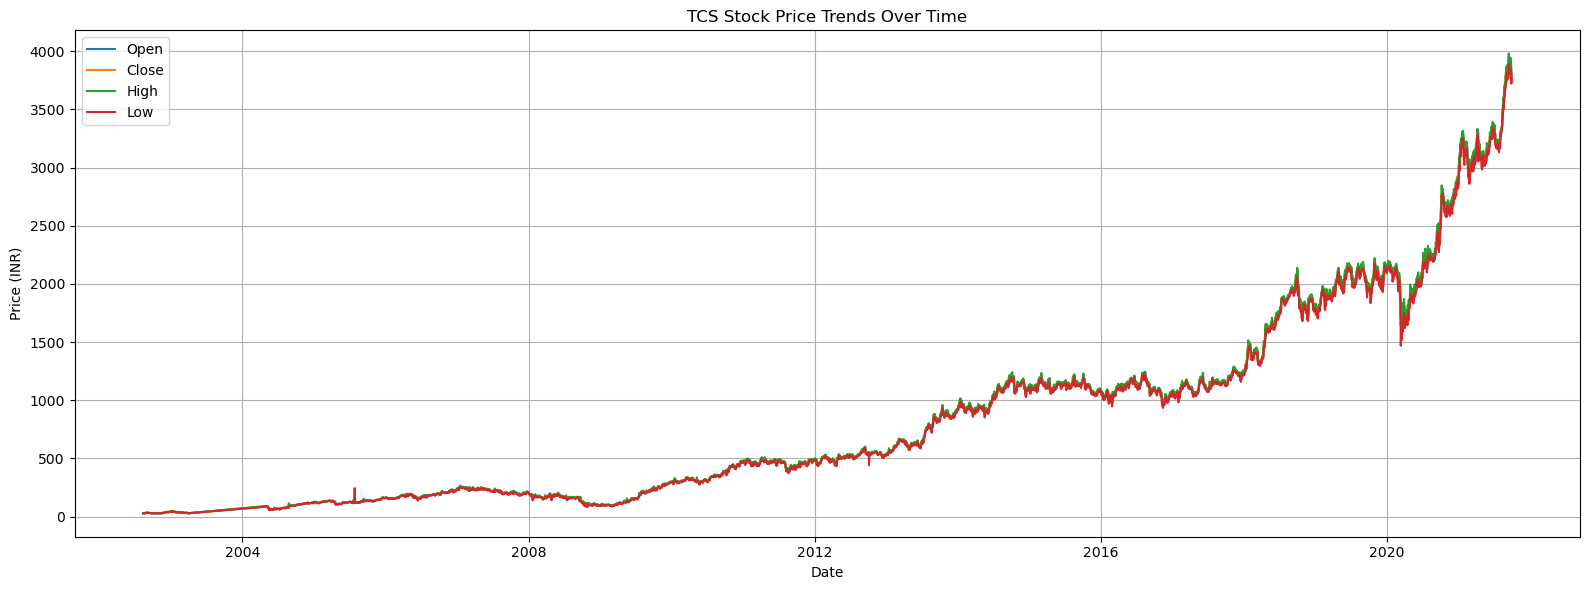

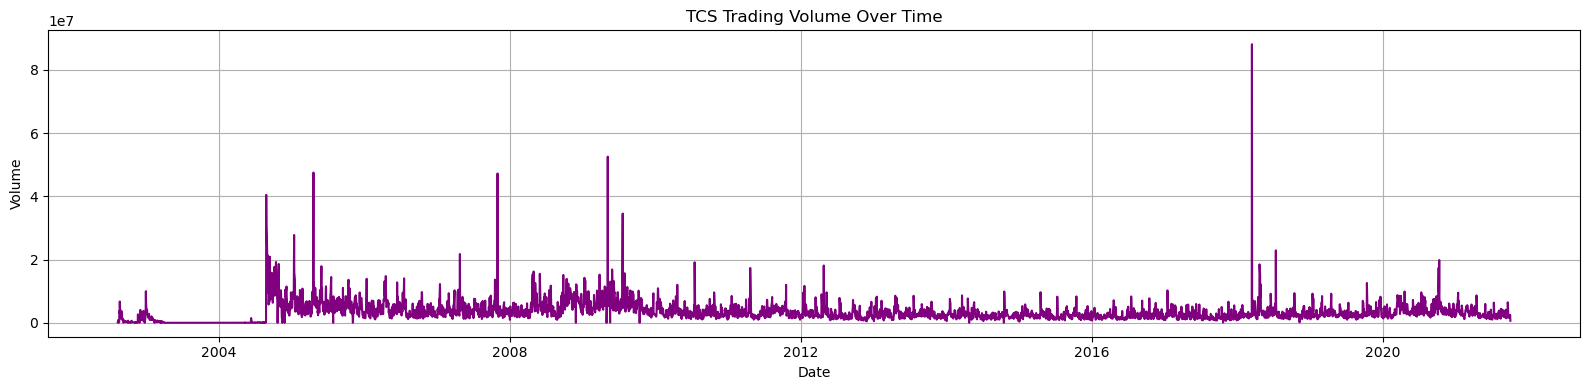

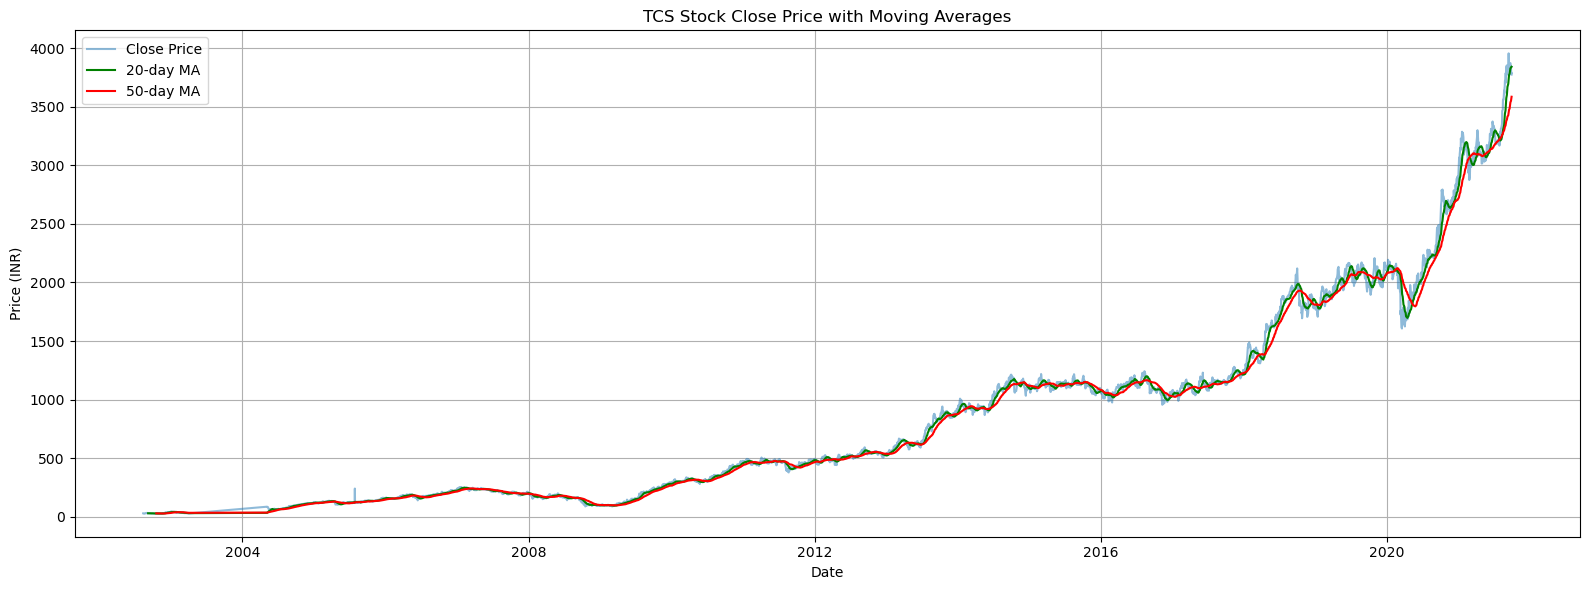

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data (if not already loaded)
file_path = r"D:\New folder (2)\unified mentor project\tcs stock market\TCS_stock_history.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Price Trends
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.title('TCS Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Volume Analysis
plt.figure(figsize=(16, 4))
sns.lineplot(x='Date', y='Volume', data=df, color='purple')
plt.title('TCS Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

# Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['MA20'], label='20-day MA', color='green')
plt.plot(df['Date'], df['MA50'], label='50-day MA', color='red')
plt.title('TCS Stock Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# Make a copy to preserve the original
df = df.copy()

# Ensure 'Date' is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract Date Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Create Lag Features
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)

# Drop rows with NaN values caused by lag features
df.dropna(inplace=True)

# Preview the result
print("Final shape of df after feature engineering:", df.shape)
print(df.head())


Final shape of df after feature engineering: (4414, 17)
         Date       Open       High        Low      Close  Volume  Dividends  \
49 2002-10-18  28.812750  29.686427  28.468855  28.859222  512312        0.0   
50 2002-10-21  29.537724  30.290574  29.184536  29.305363  646296        0.0   
51 2002-10-22  29.556315  29.556315  28.069204  28.245798  229384        0.0   
52 2002-10-23  28.440980  28.775581  27.901904  28.115675  153320        0.0   
53 2002-10-24  28.422387  28.515332  27.437179  27.623068  168744        0.0   

    Stock Splits       MA20       MA50  Year  Month  Day  Day_of_Week  \
49           0.0  28.061764  29.254985  2002     10   18            4   
50           0.0  28.098012  29.250709  2002     10   21            0   
51           0.0  28.129613  29.233236  2002     10   22            1   
52           0.0  28.144020  29.253311  2002     10   23            2   
53           0.0  28.111954  29.263535  2002     10   24            3   

    Prev_Close  Prev_Hig

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection
X = df[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']]
y = df['Close']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model initialization and training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R-Squared Score:", round(r2, 4))



Mean Squared Error: 46.24
R-Squared Score: 0.9999


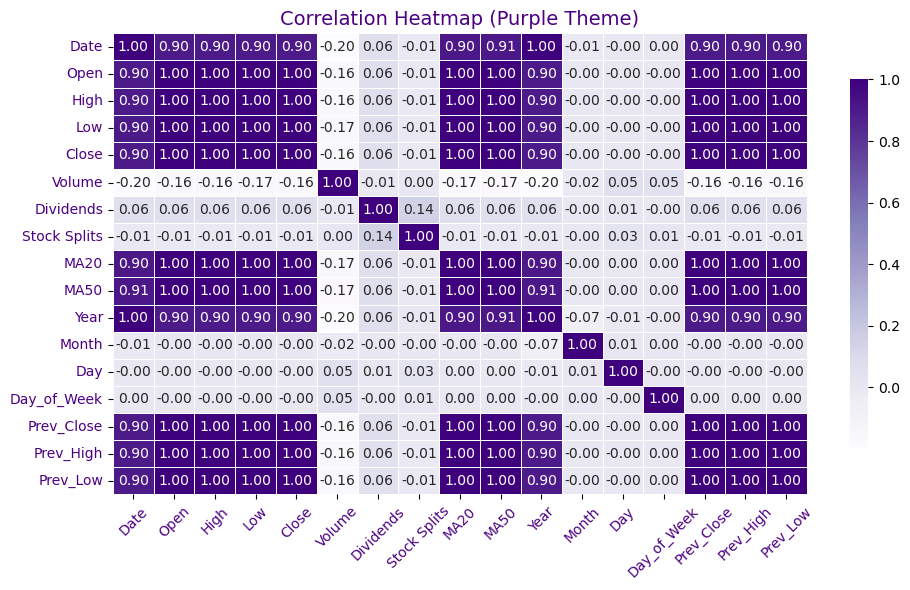

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corel = df.corr()

# Plotting heatmap with a purple theme
plt.figure(figsize=(10, 6))
sns.heatmap(corel, annot=True, cmap="Purples", fmt=".2f", 
            linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap (Purple Theme)", fontsize=14, color='#4B0082')
plt.xticks(rotation=45, color='#4B0082')
plt.yticks(rotation=0, color='#4B0082')
plt.tight_layout()
plt.show()


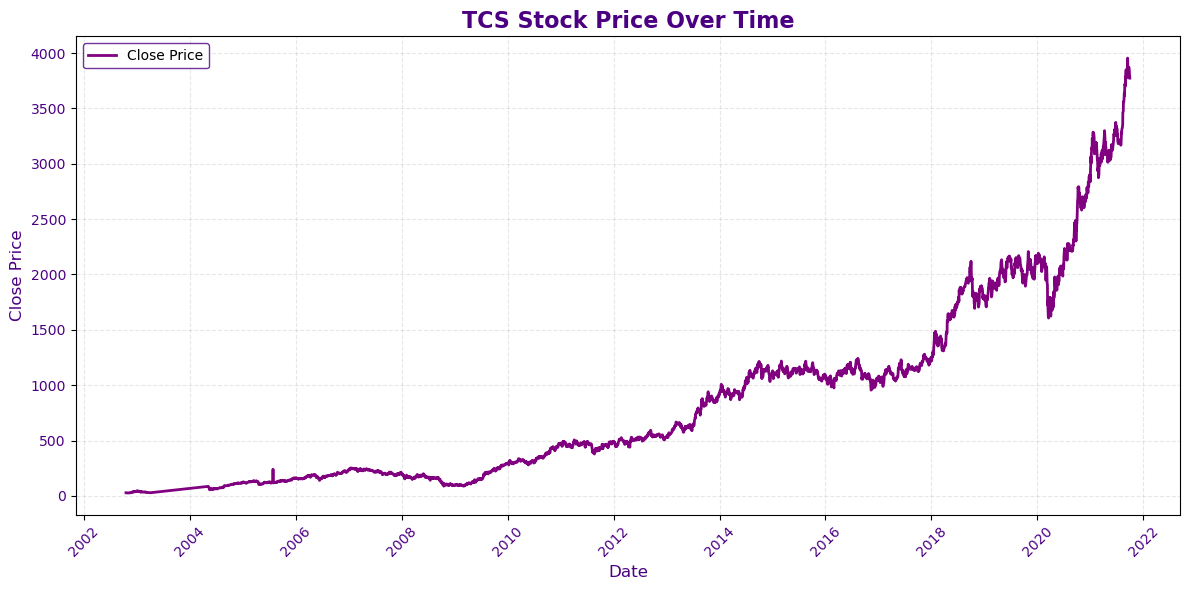

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='#800080', linewidth=2)

plt.xlabel('Date', fontsize=12, color='#4B0082')
plt.ylabel('Close Price', fontsize=12, color='#4B0082')
plt.title('TCS Stock Price Over Time', fontsize=16, weight='bold', color='#4B0082')

plt.xticks(rotation=45, color='#4B0082')
plt.yticks(color='#4B0082')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(facecolor='white', edgecolor='#4B0082')

plt.tight_layout()
plt.show()


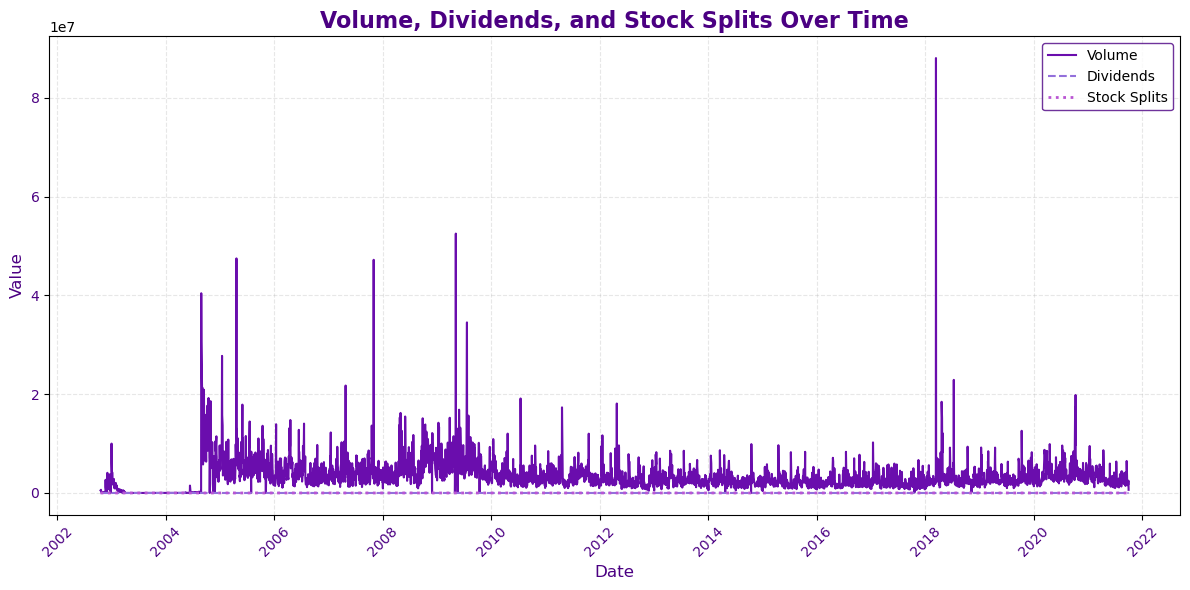

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Purple-friendly color palette
plt.plot(df['Date'], df['Volume'], label='Volume', color='#6A0DAD', linewidth=1.5)
plt.plot(df['Date'], df['Dividends'], label='Dividends', color='#9370DB', linestyle='--', linewidth=1.5)
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='#BA55D3', linestyle=':', linewidth=2)

plt.xlabel('Date', fontsize=12, color='#4B0082')
plt.ylabel('Value', fontsize=12, color='#4B0082')
plt.title('Volume, Dividends, and Stock Splits Over Time', fontsize=16, weight='bold', color='#4B0082')

plt.xticks(rotation=45, color='#4B0082')
plt.yticks(color='#4B0082')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(facecolor='white', edgecolor='#4B0082')

plt.tight_layout()
plt.show()


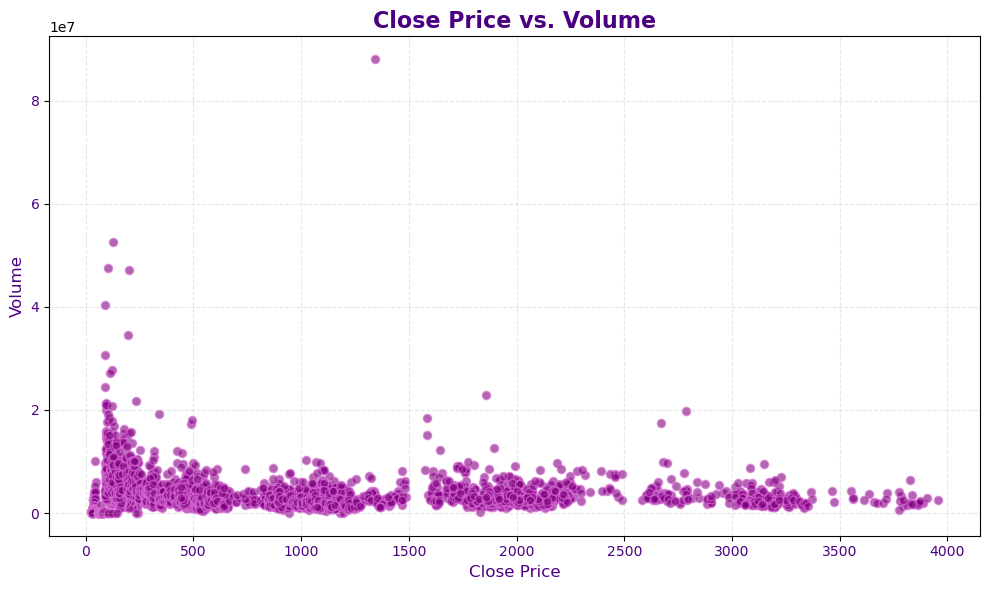

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Close'], df['Volume'], alpha=0.6, c='#800080', edgecolors='#DA70D6')

plt.xlabel('Close Price', fontsize=12, color='#4B0082')
plt.ylabel('Volume', fontsize=12, color='#4B0082')
plt.title('Close Price vs. Volume', fontsize=16, weight='bold', color='#4B0082')

plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')

plt.tight_layout()
plt.show()


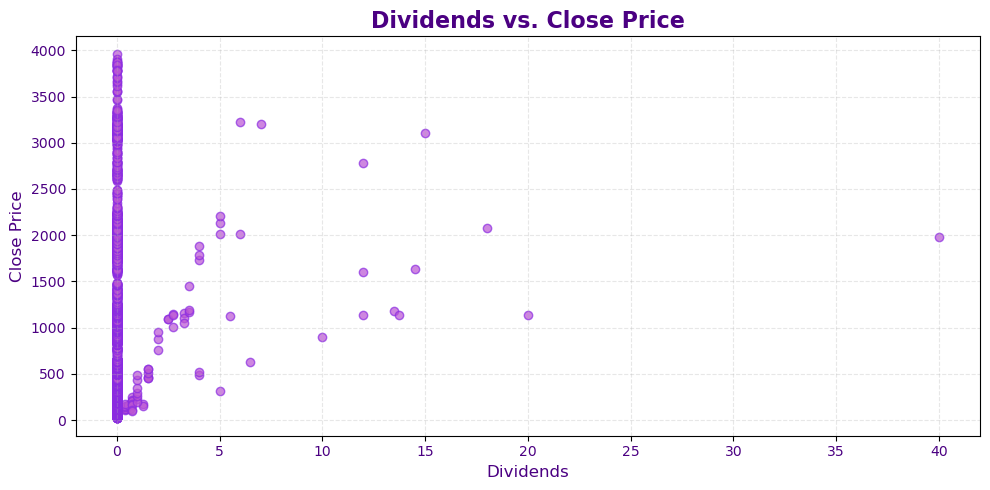

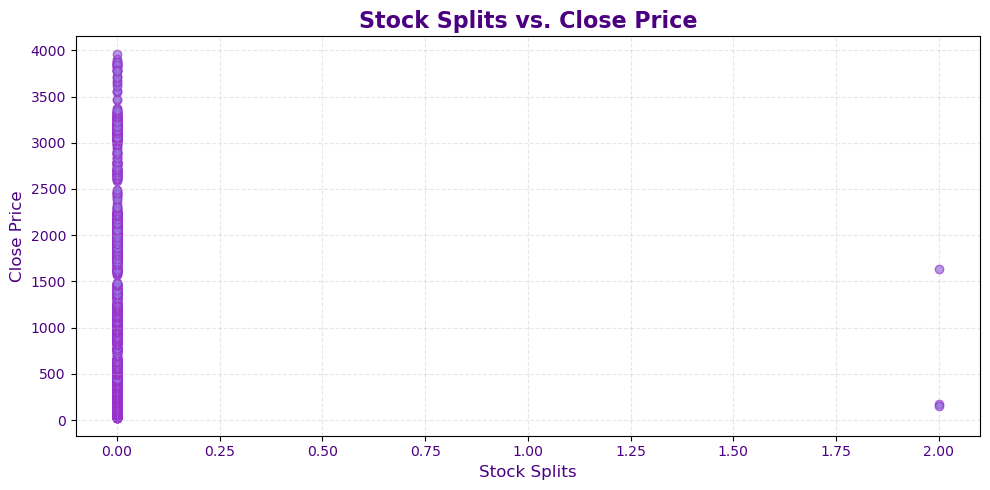

In [45]:
# Dividends vs. Close Price
plt.figure(figsize=(10, 5))
plt.scatter(df['Dividends'], df['Close'], c='#BA55D3', edgecolors='#8A2BE2', alpha=0.7)
plt.xlabel('Dividends', fontsize=12, color='#4B0082')
plt.ylabel('Close Price', fontsize=12, color='#4B0082')
plt.title('Dividends vs. Close Price', fontsize=16, weight='bold', color='#4B0082')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')
plt.tight_layout()
plt.show()

# Stock Splits vs. Close Price
plt.figure(figsize=(10, 5))
plt.scatter(df['Stock Splits'], df['Close'], c='#9370DB', edgecolors='#9932CC', alpha=0.7)
plt.xlabel('Stock Splits', fontsize=12, color='#4B0082')
plt.ylabel('Close Price', fontsize=12, color='#4B0082')
plt.title('Stock Splits vs. Close Price', fontsize=16, weight='bold', color='#4B0082')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')
plt.tight_layout()
plt.show()


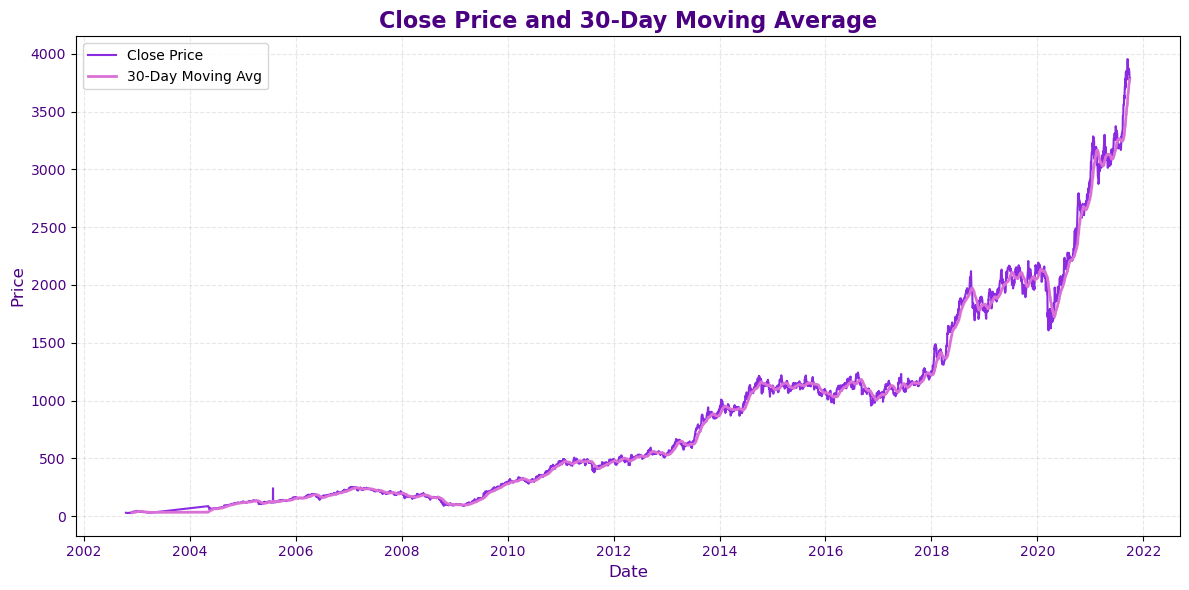

In [47]:
# 30-Day Moving Average
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='#8A2BE2', linewidth=1.5)
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='#DA70D6', linewidth=2)
plt.xlabel('Date', fontsize=12, color='#4B0082')
plt.ylabel('Price', fontsize=12, color='#4B0082')
plt.title('Close Price and 30-Day Moving Average', fontsize=16, weight='bold', color='#4B0082')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')
plt.tight_layout()
plt.show()


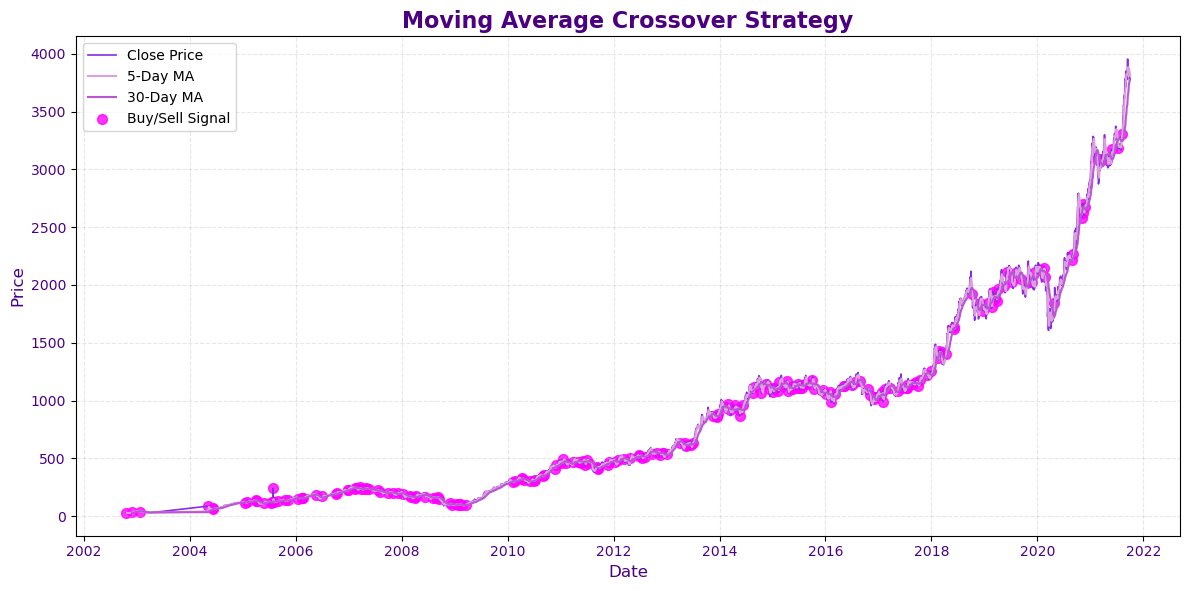

In [49]:
# Calculate moving averages
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()

# Trading signals
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='#8A2BE2', linewidth=1.2)
plt.plot(df['Date'], df['Short_MA'], label='5-Day MA', color='#DDA0DD', linewidth=1.5)
plt.plot(df['Date'], df['Long_MA'], label='30-Day MA', color='#BA55D3', linewidth=1.5)

# Mark buy/sell signals
signal_dates = df[df['Signal'].diff() != 0]  # When signal changes
plt.scatter(signal_dates['Date'], signal_dates['Close'], 
            label='Buy/Sell Signal', color='#FF00FF', marker='o', s=50, alpha=0.8)

plt.xlabel('Date', fontsize=12, color='#4B0082')
plt.ylabel('Price', fontsize=12, color='#4B0082')
plt.title('Moving Average Crossover Strategy', fontsize=16, weight='bold', color='#4B0082')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')
plt.tight_layout()
plt.show()


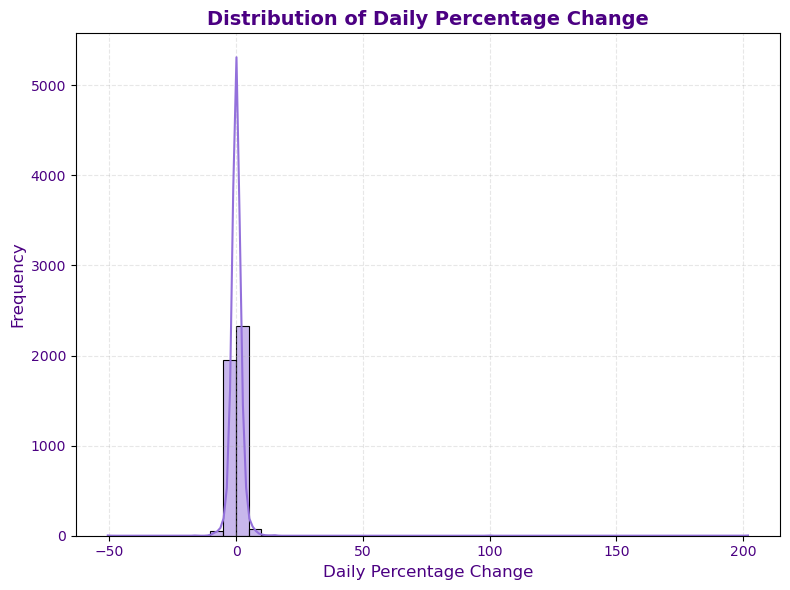

In [51]:
# Daily percentage change
df['Daily_Price_Change'] = df['Close'].pct_change() * 100

# Distribution plot with purple theme
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True, color='#9370DB', bins=50)
plt.xlabel('Daily Percentage Change', fontsize=12, color='#4B0082')
plt.ylabel('Frequency', fontsize=12, color='#4B0082')
plt.title('Distribution of Daily Percentage Change', fontsize=14, weight='bold', color='#4B0082')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')
plt.tight_layout()
plt.show()
